In [114]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy

In [115]:
data = pd.read_csv('sber_mlcource/boston_train_data.csv')
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5


In [116]:
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.00000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.730912,10.509901,11.189901,0.069307,0.556710,6.30145,68.601733,3.799666,9.836634,411.688119,18.444554,355.068243,12.598936,22.312376
std,8.943922,22.053733,6.814909,0.254290,0.117321,0.67583,28.066143,2.109916,8.834741,171.073553,2.150295,94.489572,6.925173,8.837019
min,0.006320,0.000000,0.460000,0.000000,0.392000,3.56100,2.900000,1.169100,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082382,0.000000,5.190000,0.000000,0.453000,5.90275,45.800000,2.087875,4.000000,281.000000,17.375000,374.710000,7.135000,17.100000
50%,0.253715,0.000000,9.795000,0.000000,0.538000,6.23050,76.600000,3.207450,5.000000,330.000000,19.000000,391.065000,11.265000,21.400000
75%,4.053158,12.500000,18.100000,0.000000,0.631000,6.62925,94.150000,5.222125,24.000000,666.000000,20.200000,396.007500,16.910000,25.000000
max,88.976200,95.000000,27.740000,1.000000,0.871000,8.78000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,34.370000,50.000000


/home/drfobos/Ann/ann_venv/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


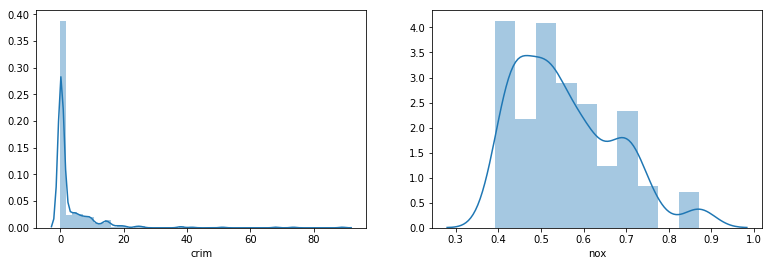

In [117]:
plt.figure(figsize=(13, 4))
plt.subplot(1, 2, 1)
sns.distplot(data['crim'])
plt.subplot(1, 2, 2)
sns.distplot(data['nox']);

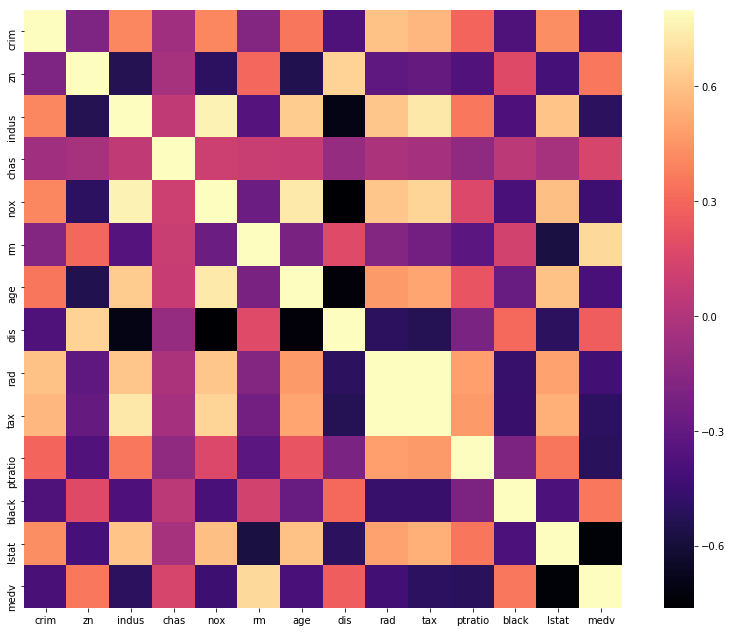

In [118]:
corr = data.corr()
plt.figure(figsize=(15, 11))
sns.heatmap(corr, vmax=.8, square=True, cmap='magma');

In [119]:
y = data.medv
data.drop(columns=['medv'], inplace=True)
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43


Построим обычную линейную регрессию

In [120]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data, y, test_size=0.3, random_state=1)

In [121]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
#обучаем регрессию
reg.fit(X_train, Y_train)
#смотрим на качество
pred = reg.predict(X_test)

Сравним результаты sklearn и statsmodels

In [122]:
import statsmodels.api as sm

X2=sm.add_constant(X_train)
est=sm.OLS(Y_train, X2)
est2=est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     70.75
Date:                Tue, 04 Dec 2018   Prob (F-statistic):           1.11e-78
Time:                        00:16:58   Log-Likelihood:                -812.42
No. Observations:                 282   AIC:                             1653.
Df Residuals:                     268   BIC:                             1704.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         26.9553      6.527      4.130      0.0

In [123]:
pd.DataFrame({'feature':data.columns, 'importance': reg.coef_})

,feature,importance
0,crim,-0.106127
1,zn,0.038094
2,indus,0.019623
3,chas,1.682880
4,nox,-9.866563
5,rm,4.457378
6,age,-0.015691
7,dis,-1.191660
8,rad,0.240355
9,tax,-0.012482


In [124]:
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
MSE(Y_test, pred), MAE(Y_test, pred)

(22.049835283394625, 3.1089304218997937)

Результаты одинаковы. Удалим незначимые признаки

In [125]:
data.drop(columns=['age','indus'], inplace=True)
data.head()

,crim,zn,chas,nox,rm,dis,rad,tax,ptratio,black,lstat
0,0.15876,0.0,0.0,0.413,5.961,5.2873,4.0,305.0,19.2,376.94,9.88
1,0.10328,25.0,0.0,0.453,5.927,6.9320,8.0,284.0,19.7,396.90,9.22
2,0.34940,0.0,0.0,0.544,5.972,3.1025,4.0,304.0,18.4,396.24,9.97
3,2.73397,0.0,0.0,0.871,5.597,1.5257,5.0,403.0,14.7,351.85,21.45
4,0.04337,21.0,0.0,0.439,6.115,6.8147,4.0,243.0,16.8,393.97,9.43


/home/drfobos/Ann/ann_venv/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


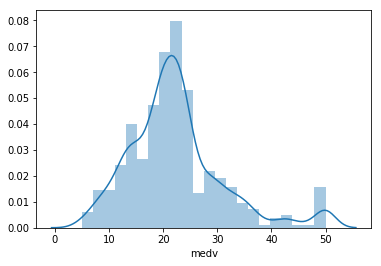

In [126]:
sns.distplot(y);

In [127]:
from sklearn.linear_model import Lasso

reg = Lasso(alpha=0.05)
reg.fit(X_train, Y_train)
pred = reg.predict(X_test)

In [128]:
MSE(Y_test, pred), MAE(Y_test, pred)

(23.436034874530158, 3.181375867301808)

In [129]:
params = np.linspace(0, 1, 20)

results = []
for a in params:
    reg = Lasso(alpha=a)
    reg.fit(X_train, Y_train)
    pred = reg.predict(X_test)
    results.append(MSE(pred, Y_test))

/home/drfobos/Ann/ann_venv/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  
/home/drfobos/Ann/ann_venv/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:477: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/home/drfobos/Ann/ann_venv/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


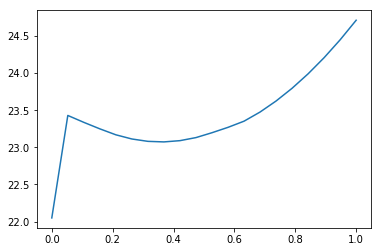

In [130]:
plt.plot(params, results)

Регурялизация не дает улучшение

# 1. Преобразование признаков

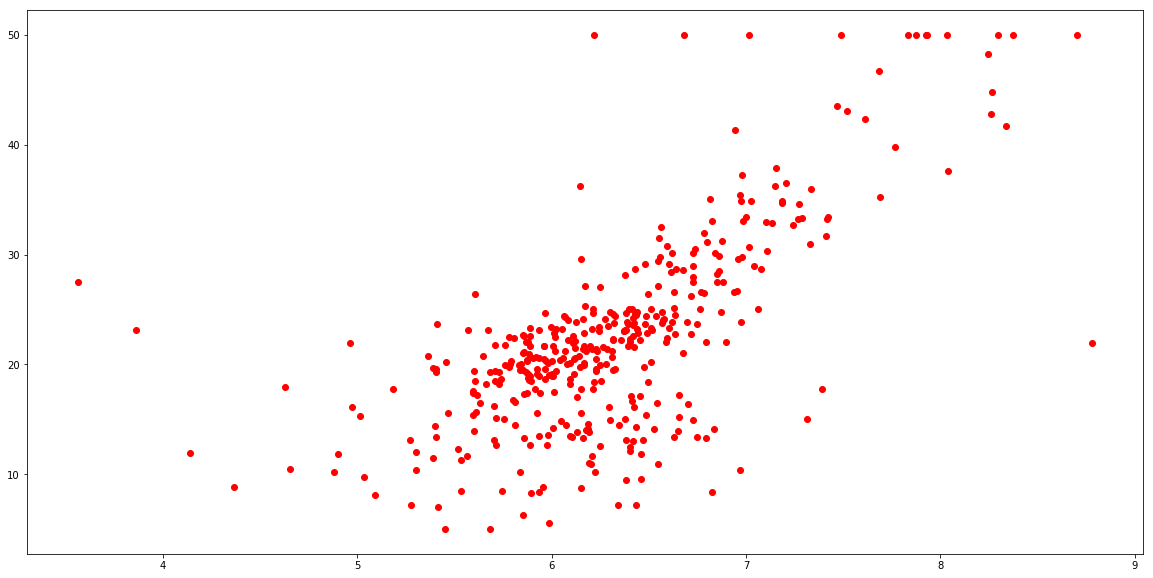

In [131]:
plt.figure(figsize=(20, 10))
plt.plot(data['rm'], y, 'o', c='red')
plt.show()

# RM

In [132]:
coefs = scipy.polyfit(data.rm, y, deg = 2)
coefs

array([  2.39333538, -21.75638127,  63.28346633])

In [133]:
poly = scipy.poly1d(coefs)
poly.coef

array([  2.39333538, -21.75638127,  63.28346633])

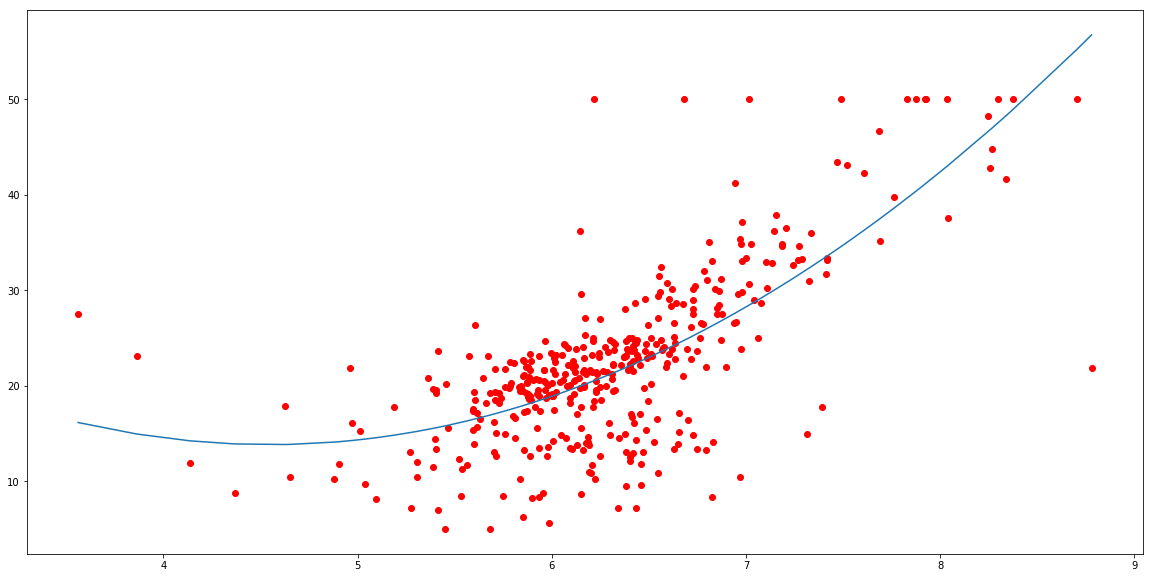

In [134]:
plt.figure(figsize=(20, 10))
plt.scatter(data.rm, y, c='red')
plt.plot(sorted(data.rm), poly(sorted(data.rm)))

In [135]:
data['rm'] = poly(np.array(data.rm))

In [136]:
X_train, X_test, Y_train, Y_test = train_test_split(data, y, test_size=0.3, random_state=1)

reg = LinearRegression()
reg.fit(X_train, Y_train)
pred = reg.predict(X_test)
MSE(Y_test, pred), MAE(Y_test, pred)

(16.886737594768753, 2.624440980634765)

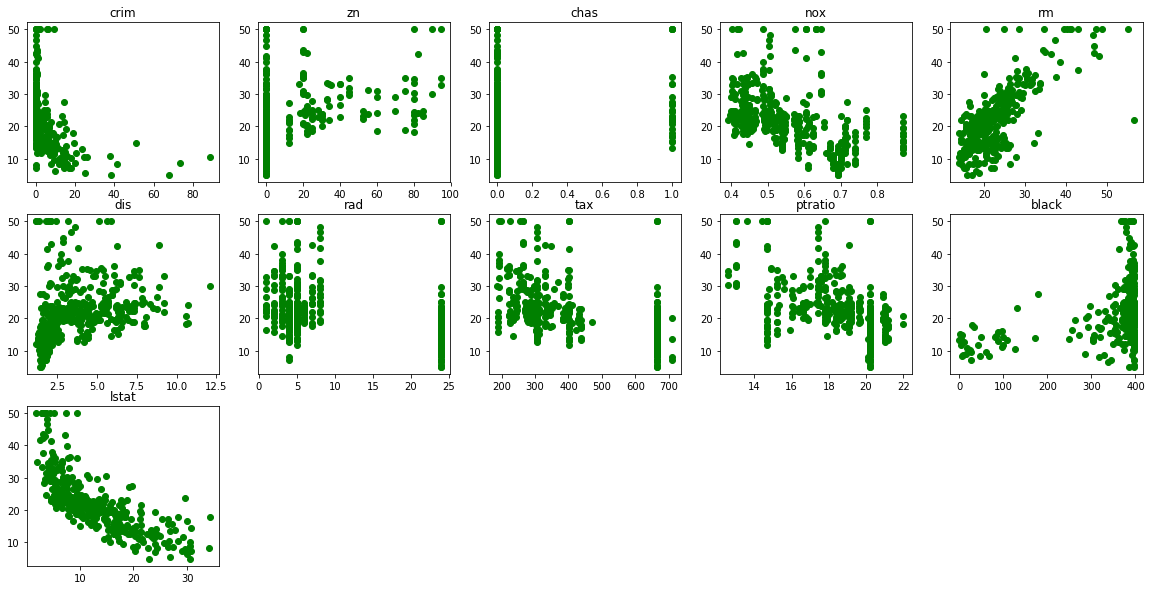

In [137]:
plt.figure(figsize=(20, 10))
for j, i in enumerate(data.columns, 1):
    plt.subplot(3,5,j)
    plt.plot(data[i], y, 'o', c='green')
    plt.title(i)
plt.show()

# LSTAT

In [138]:
coefs2 = scipy.polyfit(data.lstat, y, deg = 2)
coefs2

array([ 0.04409588, -2.30717968, 42.27138875])

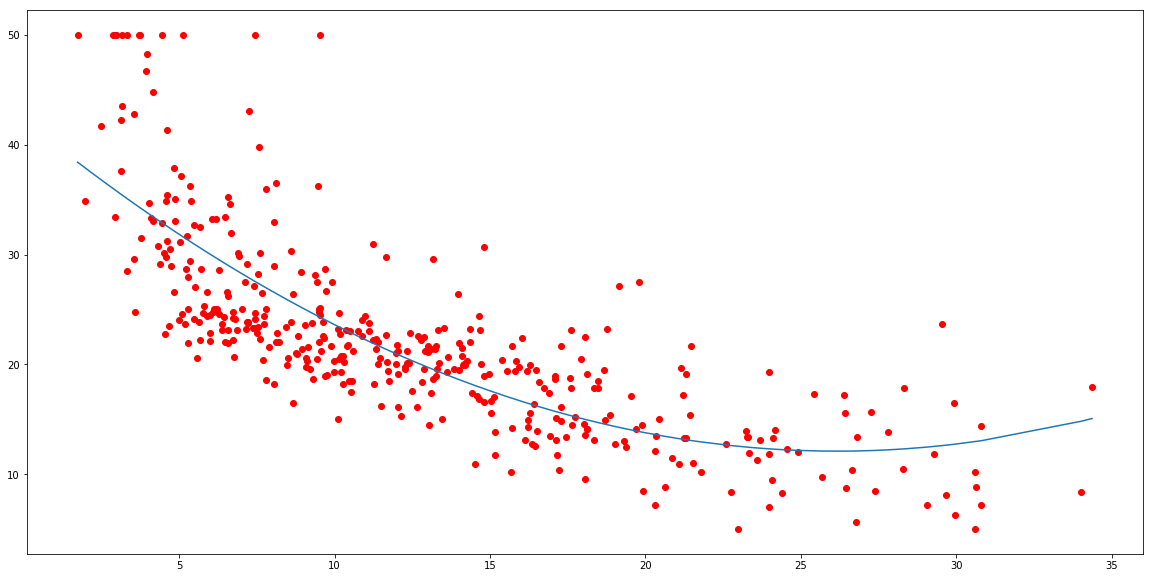

In [139]:
poly2 = scipy.poly1d(coefs2)
poly2.coef
plt.figure(figsize=(20, 10))
plt.scatter(data.lstat, y, c='red')
plt.plot(sorted(data.lstat), poly2(sorted(data.lstat)))

In [140]:
data['lstat'] = poly2(np.array(data.lstat))

In [141]:
X_train, X_test, Y_train, Y_test = train_test_split(data, y, test_size=0.3, random_state=1)

reg = LinearRegression()
reg.fit(X_train, Y_train)
pred = reg.predict(X_test)
MSE(Y_test, pred), MAE(Y_test, pred)

(15.092148217605516, 2.491561013437506)

# Ptratio

In [142]:
coefs3 = scipy.polyfit(data.ptratio, y, deg = 3)
coefs3

array([-6.99919786e-02,  3.52203534e+00, -6.03000945e+01,  3.76556909e+02])

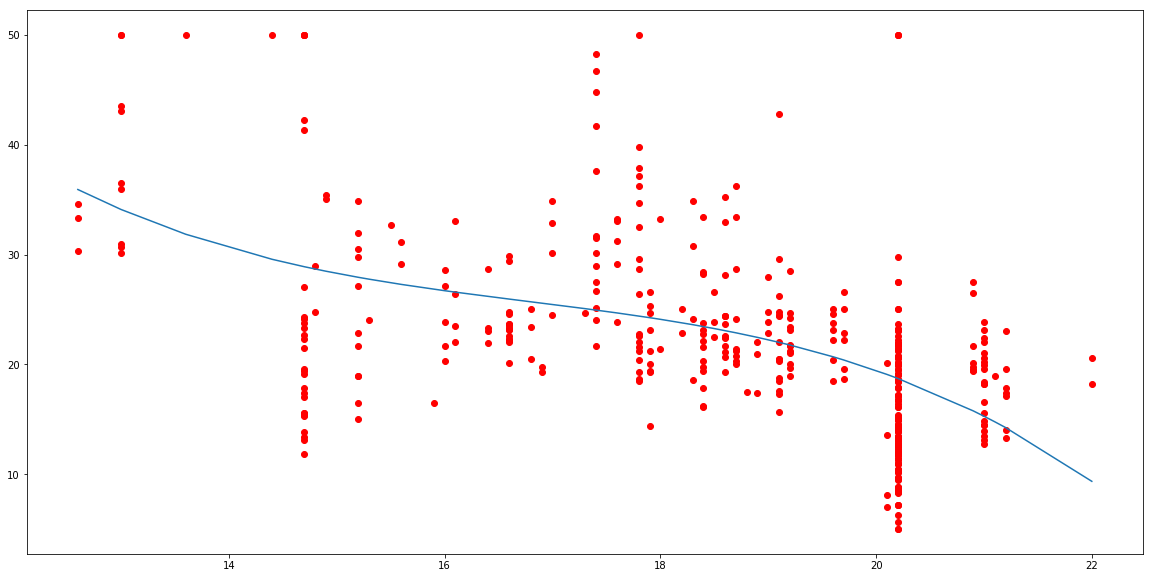

In [143]:
poly3 = scipy.poly1d(coefs3)
poly3.coef
plt.figure(figsize=(20, 10))
plt.scatter(data.ptratio, y, c='red')
plt.plot(sorted(data.ptratio), poly3(sorted(data.ptratio)))

In [144]:
data_test=data.copy()
data_test['ptratio'] = poly3(np.array(data_test.ptratio))

In [145]:
X_train, X_test, Y_train, Y_test = train_test_split(data_test, y, test_size=0.3, random_state=1)

reg = LinearRegression()
reg.fit(X_train, Y_train)
pred = reg.predict(X_test)
MSE(Y_test, pred), MAE(Y_test, pred)

(15.181387322111949, 2.511964981927905)

Преобразование не улучшило качество модели

NOX

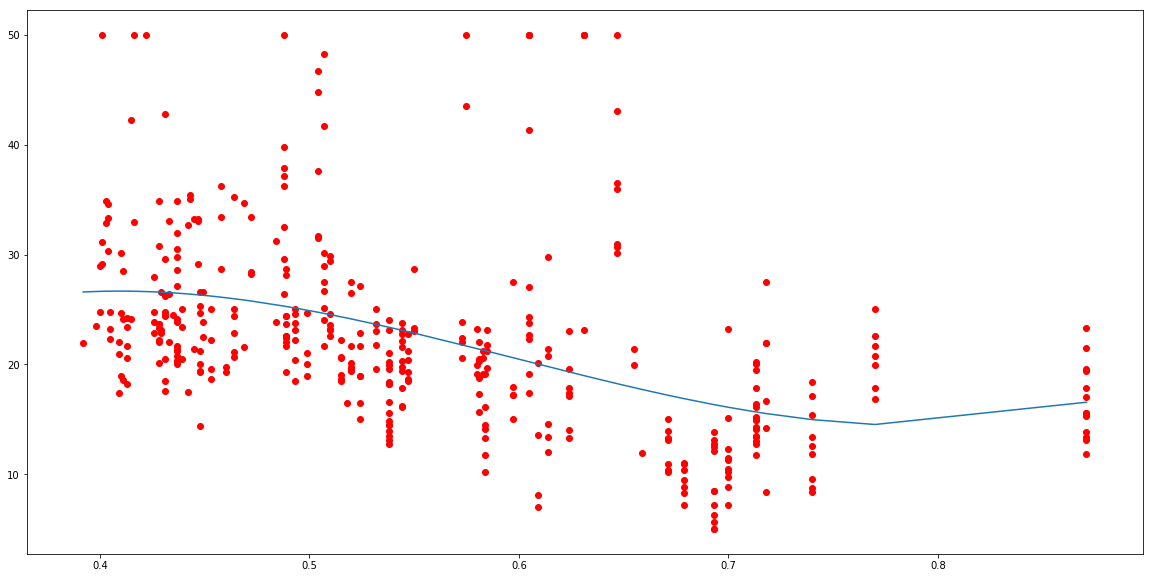

In [146]:
coefs4 = scipy.polyfit(data.nox, y, deg = 3)
poly4 = scipy.poly1d(coefs4)
poly4.coef
plt.figure(figsize=(20, 10))
plt.scatter(data.nox, y, c='red')
plt.plot(sorted(data.nox), poly4(sorted(data.nox)))

In [147]:
data_test['nox'] = poly4(np.array(data_test.nox))

In [148]:
X_train, X_test, Y_train, Y_test = train_test_split(data_test, y, test_size=0.3, random_state=1)

reg = LinearRegression()
reg.fit(X_train, Y_train)
pred = reg.predict(X_test)
MSE(Y_test, pred), MAE(Y_test, pred)

(15.022398419415389, 2.4818471311701846)

In [149]:
data['nox'] = poly4(np.array(data.nox))

# Crim

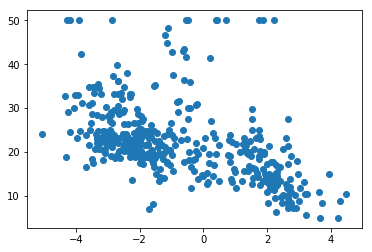

In [150]:
data['crim_adj']=np.log(data['crim'])
data.head()
plt.plot(data['crim_adj'],y,'o')

In [151]:
X_train, X_test, Y_train, Y_test = train_test_split(data, y, test_size=0.3, random_state=1)

reg = LinearRegression()
reg.fit(X_train, Y_train)
pred = reg.predict(X_test)
MSE(Y_test, pred), MAE(Y_test, pred)

(14.872142697529565, 2.4414328096299465)

# 2. Попробуйте добавить к исходным признакам их комбинации, например, сумму/произведение/частное двух признаков или их квадраты. Для каждого нового признака проверьте корреляцию с целевой переменной.

In [152]:
data_test=data.copy()
data_test['crim_zn']=data_test.crim*data_test.zn


In [153]:
X_train, X_test, Y_train, Y_test = train_test_split(data_test, y, test_size=0.3, random_state=1)

reg = LinearRegression()
reg.fit(X_train, Y_train)
pred = reg.predict(X_test)
MSE(Y_test, pred), MAE(Y_test, pred)

(14.742968297857873, 2.4208509893309524)

In [154]:
data_corr=data_test.copy()
data_corr['y']=y
corr = data_corr[['y','crim_zn','crim','zn']].corr()
corr

,y,crim_zn,crim,zn
y,1.000000,0.359501,-0.400956,0.355608
crim_zn,0.359501,1.000000,-0.153080,0.459872
crim,-0.400956,-0.153080,1.000000,-0.194770
zn,0.355608,0.459872,-0.194770,1.000000


существует высокая корреляция между новым фактором и старыми. Посмотрим как повлияет на модель удаление старых факторов

In [155]:
data_test.drop(columns=['zn'], inplace=True)
data_test.head()

,crim,chas,nox,rm,dis,rad,tax,ptratio,black,lstat,crim_adj,crim_zn
0,0.15876,0.0,26.669017,18.637311,5.2873,4.0,305.0,19.2,376.94,23.780846,-1.840362,0.00000
1,0.10328,0.0,26.219241,18.409661,6.9320,8.0,284.0,19.7,396.90,24.747712,-2.270312,2.58200
2,0.34940,0.0,23.114574,18.712147,3.1025,4.0,304.0,18.4,396.24,23.651978,-1.051538,0.00000
3,2.73397,0.0,16.549251,16.487603,1.5257,5.0,403.0,14.7,351.85,13.071010,1.005755,0.00000
4,0.04337,0.0,26.457591,19.737723,6.8147,4.0,243.0,16.8,393.97,24.435906,-3.137987,0.91077


In [156]:
X_train, X_test, Y_train, Y_test = train_test_split(data_test, y, test_size=0.3, random_state=1)

reg = LinearRegression()
reg.fit(X_train, Y_train)
pred = reg.predict(X_test)
MSE(Y_test, pred), MAE(Y_test, pred)

(14.84963328647349, 2.4285063054415312)

DIS + RAD

In [157]:
data_test=data.copy()
data_test['dis_rad']=data_test.dis+data_test.rad
data_test.drop(columns=['dis','rad'], inplace=True)

In [158]:
data_corr=data_test.copy()
data_corr['y']=y
corr = data_corr[['y','dis_rad']].corr()
corr

,y,dis_rad
y,1.000000,-0.398668
dis_rad,-0.398668,1.000000


In [159]:
X_train, X_test, Y_train, Y_test = train_test_split(data_test, y, test_size=0.3, random_state=1)

reg = LinearRegression()
reg.fit(X_train, Y_train)
pred = reg.predict(X_test)
MSE(Y_test, pred), MAE(Y_test, pred)

(17.70939678406946, 2.6945535018801614)

Качество упало, не включаем новый признак

Так как преобразования с факторами произведены проверим еще раз корреляцию и удалим сильно коррелирующие факторы

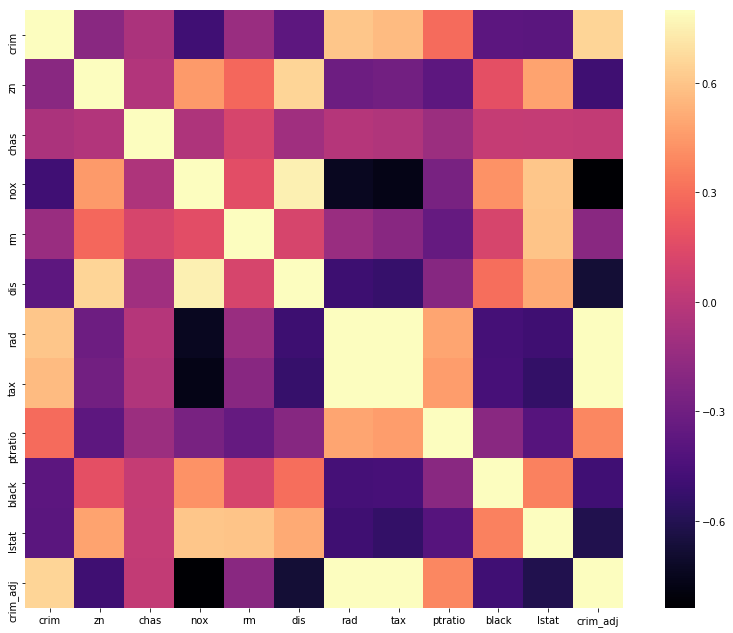

In [160]:
corr = data.corr()
plt.figure(figsize=(15, 11))
sns.heatmap(corr, vmax=.8, square=True, cmap='magma');

In [161]:
data.drop(columns=['tax','rad','crim_adj'], inplace=True)

In [162]:
X_train, X_test, Y_train, Y_test = train_test_split(data, y, test_size=0.3, random_state=1)

reg = LinearRegression()
reg.fit(X_train, Y_train)
pred = reg.predict(X_test)
MSE(Y_test, pred), MAE(Y_test, pred)

(15.807954530472946, 2.5770676204276883)

In [168]:
data.head()

,crim,zn,chas,nox,rm,dis,ptratio,black,lstat
0,0.15876,0.0,0.0,26.669017,18.637311,5.2873,19.2,376.94,23.780846
1,0.10328,25.0,0.0,26.219241,18.409661,6.9320,19.7,396.90,24.747712
2,0.34940,0.0,0.0,23.114574,18.712147,3.1025,18.4,396.24,23.651978
3,2.73397,0.0,0.0,16.549251,16.487603,1.5257,14.7,351.85,13.071010
4,0.04337,21.0,0.0,26.457591,19.737723,6.8147,16.8,393.97,24.435906


In [170]:
data_test = pd.read_csv('sber_mlcource/boston_test_data.csv')

In [171]:
data_test.drop(columns=['age','indus','tax','rad'],inplace=True)
data_test.head()

,crim,zn,chas,nox,rm,dis,ptratio,black,lstat
0,0.07886,80.0,0.0,0.411,7.148,5.1167,19.2,396.90,3.56
1,0.08873,21.0,0.0,0.439,5.963,6.8147,16.8,395.56,13.45
2,1.38799,0.0,0.0,0.538,5.950,3.9900,21.0,232.60,27.71
3,0.30347,0.0,0.0,0.493,6.312,5.4159,19.6,396.90,6.15
4,0.22927,0.0,0.0,0.448,6.030,5.6894,17.9,392.74,18.80


In [172]:
data_test['rm'] = poly(np.array(data_test.rm))
data_test['lstat'] = poly2(np.array(data_test.lstat))
data_test['nox'] = poly4(np.array(data_test.nox))

In [173]:
pred2=reg.predict(data_test)

In [174]:
s = pd.DataFrame({'id':np.arange(len(pred2)), 'price':pred2})
s.head()
s.to_csv('submission.csv', index=False)